**GRAPH NEURAL NETWORK**

In [1]:
# Install packages
!pip install torch
!pip install torch_geometric

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

Upload "participant.zip" and "data_subset.csv"

In [2]:
!unzip participants.zip
%ls

Archive:  participants.zip
   creating: participants/
   creating: participants/800573/
   creating: participants/874096/
   creating: participants/825634/
   creating: participants/800128/
   creating: participants/849123/
   creating: participants/878836/
   creating: participants/803137/
   creating: participants/862756/
   creating: participants/836486/
   creating: participants/858264/
   creating: participants/879113/
   creating: participants/821856/
   creating: participants/811602/
   creating: participants/877246/
   creating: participants/830581/
   creating: participants/837750/
   creating: participants/889566/
   creating: participants/853671/
   creating: participants/895596/
   creating: participants/871714/
   creating: participants/876703/
   creating: participants/854037/
   creating: participants/861740/
   creating: participants/891793/
   creating: participants/897602/
   creating: participants/883202/
   creating: participants/860867/
   creating: participants/86

# **Childwish= "I don't know" included**

In [3]:
import pandas as pd
import networkx as nx
import os

participant_ids = [d for d in os.listdir('participants/') if os.path.isdir(os.path.join('participants/', d))]
participant_data = pd.read_csv('data_subset.csv')
graphs = {}

for pid in participant_ids:
    alters_file_path = os.path.join('participants', pid, 'alters.csv')
    graphml_file_path = os.path.join('participants', pid, 'edgelist.graphml')
    alters_df = pd.read_csv(alters_file_path)
    G = nx.read_graphml(graphml_file_path)

    # Get participant-specific attributes from participant_data
    participant_row = participant_data[participant_data['nomem_encr'] == int(pid)]

    # Create a new node for the participant
    participant_node_id = 'n25'
    G.add_node(participant_node_id)

    # Initialize all node attributes to NA (or suitable defaults)
    na_attributes = {col: None for col in alters_df.columns if col not in ['names_a', 'node_id']}
    G.nodes[participant_node_id].update(na_attributes)

    # Update specific attributes from participant_data
    if not participant_row.empty:
        G.nodes[participant_node_id]['has_child_a'] = participant_row['has_child_num'].values[0]
        G.nodes[participant_node_id]['num_child_a'] = participant_row['num_children'].values[0]
        G.nodes[participant_node_id]['sex_a'] = participant_row['sex'].values[0]
        G.nodes[participant_node_id]['age_a'] = participant_row['age'].values[0]
        #G.nodes[participant_node_id]['num_child_a'] = participant_row['num_children'].values[0]
        #G.nodes[participant_node_id]['happiness_child_a'] = participant_row['happiness_num'].values[0]
        #G.nodes[participant_node_id]['childwish_a'] = participant_row['childwish_num'].values[0]
        #G.nodes[participant_node_id]['childfree_a'] = participant_row['has_children'].values[0]
        #G.nodes[participant_node_id]['help_child_a'] = participant_row['no_help'].values[0]

    # Connect the new participant node to all other nodes
    for node in G.nodes():
        if node != participant_node_id:
            G.add_edge(participant_node_id, node)

    for node in G.nodes():
        index = int(node[1:]) + 1
        match = alters_df[alters_df['names_a'] == index]
        if not match.empty:
            attributes = match.to_dict('records')[0]
            for key, value in attributes.items():
                G.nodes[node][key] = value

    graphs[pid] = G

In [5]:
# Childwish column arrangements

participant_data['nomem_encr'] = participant_data['nomem_encr'].astype(str)

childwish_mapping = {
  "Probably so": 1,
  "Absolutely so": 2,
  "Probably not": 3,
  "Absolutely not": 4,
 }

childwish_dict = participant_data.set_index('nomem_encr')['childwish'].to_dict()

# Update each entry in the dictionary
for key in list(graphs.keys()):

    current_graph = graphs[key]
    childwish_value = childwish_dict.get(str(key), "Default value if not found")
    childwish_number = childwish_mapping.get(childwish_value, 0)

    # Update the dictionary entry to be a list containing the graph and the 'childwish' number
    graphs[key] = [current_graph, childwish_number]

graphs

{'896472': [<networkx.classes.graph.Graph at 0x7fdbf01056f0>, 1],
 '854101': [<networkx.classes.graph.Graph at 0x7fdbe8f579d0>, 1],
 '842434': [<networkx.classes.graph.Graph at 0x7fdbe8f57b80>, 0],
 '874969': [<networkx.classes.graph.Graph at 0x7fdbe8f57940>, 1],
 '803054': [<networkx.classes.graph.Graph at 0x7fdbe8f57190>, 0],
 '806210': [<networkx.classes.graph.Graph at 0x7fdbe8f56e00>, 1],
 '822595': [<networkx.classes.graph.Graph at 0x7fdbe8f57730>, 0],
 '862756': [<networkx.classes.graph.Graph at 0x7fdbe8f57ee0>, 0],
 '808886': [<networkx.classes.graph.Graph at 0x7fdbe8f56f80>, 2],
 '854156': [<networkx.classes.graph.Graph at 0x7fdbe8f56a10>, 2],
 '858807': [<networkx.classes.graph.Graph at 0x7fdbe8f568f0>, 2],
 '835868': [<networkx.classes.graph.Graph at 0x7fdbe8f56830>, 2],
 '822604': [<networkx.classes.graph.Graph at 0x7fdbe8f56980>, 2],
 '810342': [<networkx.classes.graph.Graph at 0x7fdbe8f57c40>, 2],
 '818710': [<networkx.classes.graph.Graph at 0x7fdbe8e04f40>, 0],
 '864157':

In [6]:
# Childwish group counts

count_1 = 0
count_2 = 0
count_3 = 0
count_4 = 0
count_0 = 0


for value in list(childwish_dict.values()):
    if value == "Probably so":
        count_1 += 1
    elif value ==  "Absolutely so":
        count_2 += 1
    elif value == "Probably not":
        count_3 += 1
    elif value == "Absolutely not":
        count_4 += 1
    elif value == "I don't know":
        count_0 += 1

print("Number of entries with childwish group 1 (probably so):", count_1)
print("Number of entries with childwish group 2 (absolutely so):", count_2)
print("Number of entries with childwish group 3 (probably not):", count_3)
print("Number of entries with childwish group 4 (absolutely not):", count_4)
print("Number of entries with childwish group 0 (I don't know):", count_0)

Number of entries with childwish group 1 (probably so): 227
Number of entries with childwish group 2 (absolutely so): 190
Number of entries with childwish group 3 (probably not): 98
Number of entries with childwish group 4 (absolutely not): 89
Number of entries with childwish group 0 (I don't know): 102


In [7]:
from torch_geometric.data import Dataset, Data
import torch
import numpy as np
import pandas as pd

#Preprocessing (for age and number of children of alters) before building the model

# Defining the "age_a"

def preprocess_age(age_str, known_ages):
    if age_str == '50+':
        return 50
    elif pd.isna(age_str) or age_str is None:
        return int(np.mean(known_ages))  # Using the mean of known ages as default
    elif age_str == '18-':
        return 18
    else:
        try:
            return int(age_str)
        except ValueError:
            return int(np.mean(known_ages))

# Defining the "num_child_a"

def preprocess_num_children(num_children):
    if num_children == 'Expecting first child':
        return 1
    elif pd.isna(num_children) or num_children == "I don't know":
        return 0
    elif num_children == 'More than 5':
        return 5
    else:
        return float(num_children)


# Defining the "sex"

def preprocess_sex(sex):
    if sex == 'Female':
        return 1
    else:
        return 0

# Defining the "child_free"

def preprocess_child_free(child_free):
    if child_free == 'Prefers to remain childless':
        return 0
    elif child_free == 'Wishes to have children':
        return 1
    else:
        return 2  # "I don’t know whether person wishes to have children"

# Defining the "friend"

def preprocess_friend(friend):
    if friend == 'Yes, is a friend':
        return 1
    else:
        return 0  # "No, is not a friend"

# Defining the "help"

def preprocess_help(help):
    if help == 'Could ask for help in caring for child':
        return 1
    else:
        return 0  # "Could not ask for help in caring for child"

# Defining the "childwish_a"

def preprocess_childwish_a(childwish_a):
    if childwish_a == 'Wishes to have children':
        return 1
    else:
        return 0  # "I don't know whether the person wishes to have children & None"

# Defining the "age_child"

def preprocess_age_child(age_child):

    if age_child == 'Between 0 and 6 months' or age_child == 'Between 6 and 12 months' or 'Expecting first child':
        return 0.5
    elif age_child == 'Between 1 and 2 years':
        return 1
    elif age_child == 'Between 2 and 3 years':
        return 2
    elif age_child == 'Between 3 and 4 years':
        return 3
    elif age_child == 'Between 4 and 5 years':
        return 4
    elif age_child == 'Older than 5 years':
        return 5
    else:
        return 0  # "I don't know"

def preprocess_face2face(face2face):

    if face2face == 'About once a month':
        return 1
    elif face2face == 'Several times a month':
        return 1
    elif face2face == 'Several times a week':
        return 2
    elif face2face == 'Daily':
        return 3
    else:
        return 0  # "A few times a year or less"

def preprocess_closeness(closeness):

    if closeness == 'Very close':
        return 1
    elif closeness == 'Close':
        return 2
    elif closeness == 'A bit close':
        return 3
    elif closeness == 'Not close':
        return 4
    else:
        return 0  # "Not at all close"

def preprocess_contact(contact):

    if contact == 'Daily':
        return 1
    elif contact == 'Several times a week':
        return 2
    elif contact == 'Several times a month':
        return 3
    elif contact == 'About once a month':
        return 4
    else:
        return 0  # "A few times a year or less"

# Defining the "has_child"

def preprocess_has_child(has_child):
    if has_child == 'Does have (a) child(ren) or is expecting a child' or has_child == 1:
        return 1
    else:
        return 0  # "Does not have (a) child(ren) and is not expecting a child & 0"

# Defining the "talk"

def preprocess_talk(talk):
    if talk == 'Do discuss having children with this person':
        return 1
    else:
        return 0  # "Do not discuss having children with this person "


def graph_to_data_object(G, label):
    y = torch.tensor(label, dtype=torch.long)

    # Node mapping to indices
    node_mapping = {node: i for i, node in enumerate(G.nodes())}

    # Edges
    edge_list = [(node_mapping[u], node_mapping[v]) for u, v in G.edges()]
    edge_index = torch.tensor(edge_list, dtype=torch.long).t().contiguous()

    # Collect all ages
    all_ages = []
    for node in G.nodes(data=True):
        age = node[1].get('age_a', None)
        if age is not None and age != '50+' and age != '18-' and not pd.isna(age):
            try:
                age = int(age)
                all_ages.append(age)
            except ValueError:
                pass



    # Node features
    features = []
    for node in G.nodes(data=True):
        node_data = node[1]
        sex = preprocess_sex(node_data.get('sex_a', None))
        age = preprocess_age(node_data.get('age_a', None), all_ages)
        # education=...
        closeness = preprocess_closeness (node_data.get('closeness_a', None))
        face2face = preprocess_face2face (node_data.get('contact_f2f_a', None))
        contact = preprocess_contact (node_data.get('contact_other_a', None))
        # primary_relation_a = ...
        friend = preprocess_friend(node_data.get('friend_a', None))
        has_child = preprocess_has_child(node_data.get('has_child_a', None))
        num_children = preprocess_num_children(node_data.get('num_child_a', 0))
        age_child = preprocess_age_child(node_data.get('age_child_a', None))
        # happiness= ... (will not included)
        childwish_a = preprocess_childwish_a(node_data.get('childwish_a', None))
        child_free = preprocess_child_free(node_data.get('childfree_a', None))
        help = preprocess_help(node_data.get('help_child_a', None))
        talk = preprocess_talk(node_data.get('talk_child_a', None))


# Choosing the model's attributes

        features.append([age, sex, closeness, face2face, contact, friend, has_child,
                         num_children, age_child, childwish_a, child_free, help, talk])

    x = torch.tensor(features, dtype=torch.float)

    return Data(x=x, edge_index=edge_index, y=y)

# List of known ages
known_ages = []
for key in graphs.keys():
    graph, _ = graphs[key]
    for node in graph.nodes(data=True):
        age = node[1].get('age_a', None)
        if age is not None and age != '50+' and age != '18-' and not pd.isna(age):
            try:
                age = int(age)
                known_ages.append(age)
            except ValueError:
                pass

# Calculate the mean of known ages
known_ages_mean = np.mean(known_ages)

for key in graphs.keys():

    graph, label = graphs[key]
    data_object = graph_to_data_object(graph, label)

    # Print the Data format
    #print(key)
    #print(data_object)


In [8]:
from torch_geometric.data import Dataset, Data
import torch

class SocialNetworkDataset(Dataset):
    def __init__(self, graphs, transform=None, pre_transform=None):
        super(SocialNetworkDataset, self).__init__(None, transform, pre_transform)
        self.graphs = graphs
        self.data_list = [self.convert_to_data(graph, label) for graph, label in graphs.values()]
        self.total_classes = self.calculate_num_classes()

    def convert_to_data(self, graph, label):
        # Convert the graph and label into a PyTorch Geometric Data object
        return graph_to_data_object(graph, label)

    def calculate_num_classes(self):
        # Collect all unique labels
        unique_labels = set()
        for data in self.data_list:
            if data.y.numel() > 1:
                unique_labels.update(data.y.tolist())
            else:
                unique_labels.add(data.y.item())
        return len(unique_labels)

    def len(self):
        return len(self.data_list)

    def get(self, idx):
        return self.data_list[idx]



dataset = SocialNetworkDataset(graphs)
print(dataset.data_list)


[Data(x=[26, 13], edge_index=[2, 122], y=1), Data(x=[26, 13], edge_index=[2, 103], y=1), Data(x=[26, 13], edge_index=[2, 63], y=0), Data(x=[26, 13], edge_index=[2, 59], y=1), Data(x=[26, 13], edge_index=[2, 104], y=0), Data(x=[26, 13], edge_index=[2, 104], y=1), Data(x=[26, 13], edge_index=[2, 61], y=0), Data(x=[26, 13], edge_index=[2, 39], y=0), Data(x=[26, 13], edge_index=[2, 67], y=2), Data(x=[26, 13], edge_index=[2, 105], y=2), Data(x=[26, 13], edge_index=[2, 76], y=2), Data(x=[26, 13], edge_index=[2, 67], y=2), Data(x=[26, 13], edge_index=[2, 115], y=2), Data(x=[26, 13], edge_index=[2, 79], y=2), Data(x=[26, 13], edge_index=[2, 92], y=0), Data(x=[26, 13], edge_index=[2, 94], y=3), Data(x=[26, 13], edge_index=[2, 108], y=2), Data(x=[26, 13], edge_index=[2, 94], y=2), Data(x=[26, 13], edge_index=[2, 113], y=3), Data(x=[26, 13], edge_index=[2, 193], y=2), Data(x=[26, 13], edge_index=[2, 72], y=2), Data(x=[26, 13], edge_index=[2, 47], y=0), Data(x=[26, 13], edge_index=[2, 120], y=0), 

In [9]:
from torch_geometric.loader import DataLoader
from sklearn.model_selection import KFold

torch.manual_seed(12345)
dataset = dataset.shuffle()

# 5 Fold CV
k_fold = KFold(n_splits=5, shuffle=True, random_state=12345)

for fold, (train_index, test_index) in enumerate(k_fold.split(dataset)):
    train_dataset = dataset[train_index]
    test_dataset = dataset[test_index]

    print(f'Fold {fold + 1}:')
    print('========')

    print(f'Number of training graphs: {len(train_dataset)}')
    print(f'Number of test graphs: {len(test_dataset)}')

    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

    for step, data in enumerate(train_loader):
        print(f'Step {step + 1} (Training):')
        print('===================')
        print(f'Number of graphs in the current batch: {data.num_graphs}')
        print(data)
        print()

    for step, data in enumerate(test_loader):
        print(f'Step {step + 1} (Testing):')
        print('==================')
        print(f'Number of graphs in the current batch: {data.num_graphs}')
        print(data)
        print()


Fold 1:
Number of training graphs: 564
Number of test graphs: 142
Step 1 (Training):
Number of graphs in the current batch: 64
DataBatch(x=[1664, 13], edge_index=[2, 6433], y=[64], batch=[1664], ptr=[65])

Step 2 (Training):
Number of graphs in the current batch: 64
DataBatch(x=[1664, 13], edge_index=[2, 6547], y=[64], batch=[1664], ptr=[65])

Step 3 (Training):
Number of graphs in the current batch: 64
DataBatch(x=[1664, 13], edge_index=[2, 5856], y=[64], batch=[1664], ptr=[65])

Step 4 (Training):
Number of graphs in the current batch: 64
DataBatch(x=[1664, 13], edge_index=[2, 6296], y=[64], batch=[1664], ptr=[65])

Step 5 (Training):
Number of graphs in the current batch: 64
DataBatch(x=[1664, 13], edge_index=[2, 6682], y=[64], batch=[1664], ptr=[65])

Step 6 (Training):
Number of graphs in the current batch: 64
DataBatch(x=[1664, 13], edge_index=[2, 6279], y=[64], batch=[1664], ptr=[65])

Step 7 (Training):
Number of graphs in the current batch: 64
DataBatch(x=[1664, 13], edge_inde

In [10]:
# Defining the GNN layers

from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.nn import global_mean_pool


class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(dataset.num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, hidden_channels)
        self.lin = Linear(hidden_channels, dataset.total_classes)

    def forward(self, x, edge_index, batch):
        # 1. Obtain node embeddings
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = self.conv2(x, edge_index)
        x = x.relu()
        x = self.conv3(x, edge_index)

        # 2. Readout layer
        x = global_mean_pool(x, batch)  # [batch_size, hidden_channels]

        # 3. Apply a final classifier
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin(x)

        return x

model = GCN(hidden_channels=64)
print(model)

GCN(
  (conv1): GCNConv(13, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 64)
  (lin): Linear(in_features=64, out_features=5, bias=True)
)


In [11]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = GCN(hidden_channels=64)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

def train():
    model.train()

    for data in train_loader:
         out = model(data.x, data.edge_index, data.batch)
         loss = criterion(out, data.y)
         loss.backward()
         optimizer.step()
         optimizer.zero_grad()

def test(loader):
     model.eval()

     correct = 0
     for data in loader:
         out = model(data.x, data.edge_index, data.batch)
         pred = out.argmax(dim=1)
         correct += int((pred == data.y).sum())
     return correct / len(loader.dataset)

for epoch in range(1, 171):
    train()
    train_acc = test(train_loader)
    test_acc = test(test_loader)
    print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

<IPython.core.display.Javascript object>

Epoch: 001, Train Acc: 0.3239, Test Acc: 0.3121
Epoch: 002, Train Acc: 0.3239, Test Acc: 0.3121
Epoch: 003, Train Acc: 0.3239, Test Acc: 0.3121
Epoch: 004, Train Acc: 0.3239, Test Acc: 0.3121
Epoch: 005, Train Acc: 0.3239, Test Acc: 0.3121
Epoch: 006, Train Acc: 0.3239, Test Acc: 0.3121
Epoch: 007, Train Acc: 0.3204, Test Acc: 0.3121
Epoch: 008, Train Acc: 0.3717, Test Acc: 0.3546
Epoch: 009, Train Acc: 0.3770, Test Acc: 0.3617
Epoch: 010, Train Acc: 0.3823, Test Acc: 0.3404
Epoch: 011, Train Acc: 0.3522, Test Acc: 0.3262
Epoch: 012, Train Acc: 0.3805, Test Acc: 0.3475
Epoch: 013, Train Acc: 0.3575, Test Acc: 0.3262
Epoch: 014, Train Acc: 0.3398, Test Acc: 0.2837
Epoch: 015, Train Acc: 0.3628, Test Acc: 0.3050
Epoch: 016, Train Acc: 0.3664, Test Acc: 0.3404
Epoch: 017, Train Acc: 0.2761, Test Acc: 0.2695
Epoch: 018, Train Acc: 0.3628, Test Acc: 0.3546
Epoch: 019, Train Acc: 0.3558, Test Acc: 0.3475
Epoch: 020, Train Acc: 0.3699, Test Acc: 0.3121
Epoch: 021, Train Acc: 0.3593, Test Acc:

In [12]:
import pandas as pd

# Define a function to collect predictions and ground truth labels
def collect_predictions(loader):
    predictions = []
    true_class = []

    for data in loader:
        out = model(data.x, data.edge_index, data.batch)
        pred = out.argmax(dim=1)
        predictions.extend(pred.tolist())
        true_class.extend(data.y.tolist())

    return predictions, true_class

train_predictions, train_true_class = collect_predictions(train_loader)
test_predictions, test_true_class = collect_predictions(test_loader)

train_results_df = pd.DataFrame({
    'Prediction': train_predictions,
    'True Class': train_true_class
})

test_results_df = pd.DataFrame({
    'Prediction': test_predictions,
    'True Class': test_true_class
})

# Save the results to CSV files
train_results_df.to_csv('/content/train_results.csv', index=False)
test_results_df.to_csv('/content/test_results.csv', index=False)


train_results_df = pd.read_csv('/content/train_results.csv')
test_results_df = pd.read_csv('/content/test_results.csv')

print("Train Results:")
print(train_results_df)

print("\nTest Results:")
print(test_results_df)


Train Results:
     Prediction  True Class
0             1           0
1             4           3
2             1           1
3             4           3
4             1           1
..          ...         ...
560           2           1
561           1           1
562           1           0
563           1           1
564           1           4

[565 rows x 2 columns]

Test Results:
     Prediction  True Class
0             1           0
1             4           0
2             4           4
3             2           3
4             4           3
..          ...         ...
136           4           2
137           1           2
138           4           4
139           1           1
140           1           0

[141 rows x 2 columns]


In [13]:
from sklearn.metrics import mean_squared_error

# Collect predictions and true class labels for train and test sets
train_predictions, train_true_class = collect_predictions(train_loader)
test_predictions, test_true_class = collect_predictions(test_loader)

# Calculate MSE for train and test sets
train_mse = mean_squared_error(train_true_class, train_predictions)
test_mse = mean_squared_error(test_true_class, test_predictions)

print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")


Train MSE: 2.2460
Test MSE: 2.0993


## **Checks**

   source target
0      n0     n1
1      n0     n2
2      n0    n12
3      n0    n14
4      n0    n25
..    ...    ...
63    n20    n25
64    n21    n25
65    n22    n25
66    n23    n25
67    n24    n25

[68 rows x 2 columns]


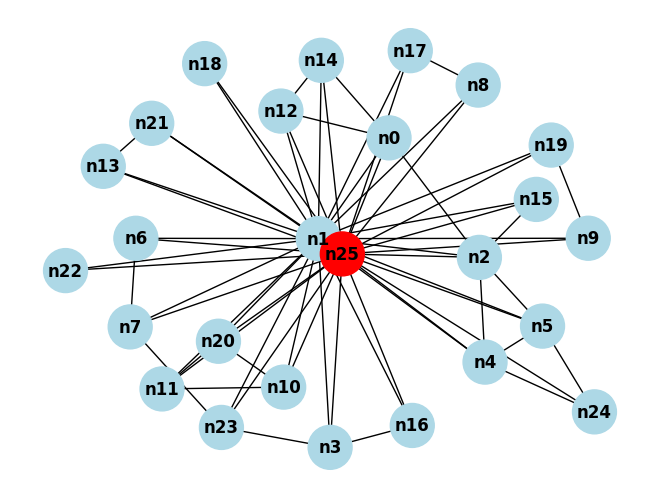

In [15]:
import matplotlib.pyplot as plt

# Convert graph edges to DataFrame
edge_df = nx.to_pandas_edgelist(G)

print(edge_df)

node_colors = ['lightblue' if node != 'n25' else 'red' for node in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors, node_size=1000, font_size=12, font_weight='bold')

plt.show()